In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_customers = pd.read_csv('customers.csv')          #1     #importing & creating a dataframe for all 7 csv files#
df_orders = pd.read_csv('orders.csv')                #2
df_order_items = pd.read_csv('order_items.csv')      #3
df_payments = pd.read_csv('payments.csv')            #4
df_products = pd.read_csv('products.csv')            #5
df_sellers = pd.read_csv('sellers.csv')              #6
df_user_feedback = pd.read_csv('user_feedback.csv')  #7


In [169]:
df_customers.head(3)              #checking the first 3 records in "customers.csv" #

,customer_id,customer_unique_id,customer_state
0,06b8999e2f,861eff4711,SP
1,18955e83d3,290c77bc52,SP
2,4e7b3e0028,060e732b5b,SP


In [3]:
df_orders.sample(8)                 #checking the first 2 records in "orders.csv" #

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new)
91238,77c6569705,543e8185af,delivered,16-05-17 17:41,16-05-17 17:50,17-05-17 9:05,01-06-17 14:43,20-06-17 0:00,16,16
91102,9a75a775d1,97efa29b4c,delivered,11-01-17 15:56,13-01-17 2:10,17-01-17 12:13,24-01-17 14:14,23-02-17 0:00,11,11
85035,479c3d9dba,8cca023b5d,delivered,25-02-18 18:03,26-02-18 18:10,27-02-18 19:02,22-03-18 19:29,20-03-18 0:00,24,24
84526,03ecec2452,0d34797f47,delivered,11-06-18 12:58,11-06-18 20:23,12-06-18 14:35,21-06-18 11:37,17-07-18 0:00,10,10
18955,51b60dccff,5c05ebb5e9,delivered,06-01-18 18:58,06-01-18 19:07,08-01-18 19:32,11-01-18 19:22,09-02-18 0:00,5,5
78863,687114e8d8,d7596b2c9f,delivered,16-03-18 7:38,17-03-18 15:15,20-03-18 23:33,26-03-18 22:42,10-04-18 0:00,9,9
6376,5a58354708,a6df8d7ce4,delivered,08-06-17 9:18,08-06-17 9:30,08-06-17 14:08,19-06-17 14:27,03-07-17 0:00,11,11
11868,450c4a4d9a,5d990cc985,delivered,09-07-18 11:39,09-07-18 11:50,10-07-18 14:35,11-07-18 21:25,20-07-18 0:00,2,2


In [140]:
df_customers.shape   # checking the shape of the data#

(99441, 3)

In [141]:
df_orders.shape

(99441, 10)

# Merging "customers" & "orders" dataframes

In [3]:
df12=pd.merge(df_customers,df_orders, on='customer_id',how='inner')
df12.head(5)

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new)
0,06b8999e2f,861eff4711,SP,00e7ee1b05,delivered,16-05-17 15:05,16-05-17 15:22,23-05-17 10:47,25-05-17 10:35,05-06-17 0:00,9,9
1,18955e83d3,290c77bc52,SP,2.92E+13,delivered,12-01-18 20:48,12-01-18 20:58,15-01-18 17:14,29-01-18 12:41,06-02-18 0:00,17,17
2,4e7b3e0028,060e732b5b,SP,b2059ed67c,delivered,19-05-18 16:07,20-05-18 16:19,11-06-18 14:31,14-06-18 17:58,13-06-18 0:00,25,25
3,b2b6027bc5,259dac7578,SP,951670f923,delivered,13-03-18 16:06,13-03-18 17:29,27-03-18 23:22,28-03-18 16:04,10-04-18 0:00,15,15
4,4f2d8ab171,345ecd01c3,SP,6b7d50bd14,delivered,29-07-18 9:51,29-07-18 10:10,30-07-18 15:16,09-08-18 20:55,15-08-18 0:00,11,11


In [143]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99128 entries, 0 to 99127
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customer_id                       99128 non-null  object
 1   customer_unique_id                99128 non-null  object
 2   customer_state                    99128 non-null  object
 3   order_id                          99128 non-null  object
 4   order_status                      99128 non-null  object
 5   order_purchase_timestamp          99128 non-null  object
 6   order_approved_at                 98969 non-null  object
 7   order_delivered_to_carrier_date   97348 non-null  object
 8   order_delivered_to_customer_date  96170 non-null  object
 9   order_estimated_delivery_date     99128 non-null  object
 10  order_delivery days               99128 non-null  int64 
 11  order delivery days(new)          99128 non-null  int64 
dtypes: int64(2), objec

In [172]:
df12.isnull().sum().sort_values(ascending=False)             

order_delivered_to_customer_date    2958
order_delivered_to_carrier_date     1780
order_approved_at                    159
order delivery days(new)               0
order_delivery days                    0
order_estimated_delivery_date          0
order_purchase_timestamp               0
order_status                           0
order_id                               0
customer_state                         0
customer_unique_id                     0
customer_id                            0
dtype: int64



# Question 1

/Find the percentage of orders which are 'delivered','cancelled' & 'invoiced'?/ 

In [173]:
B=pd.value_counts(df12['order_status'],normalize= True)*100
B

delivered      97.017997
shipped         1.113712
canceled        0.627472
unavailable     0.614357
invoiced        0.316762
processing      0.302639
created         0.005044
approved        0.002018
Name: order_status, dtype: float64

In [174]:
 count_of_orders=df12.groupby('order_status')['order_id'].count().sort_values(ascending=False)
 count_of_orders   

order_status
delivered      96172
shipped         1104
canceled         622
unavailable      609
invoiced         314
processing       300
created            5
approved           2
Name: order_id, dtype: int64

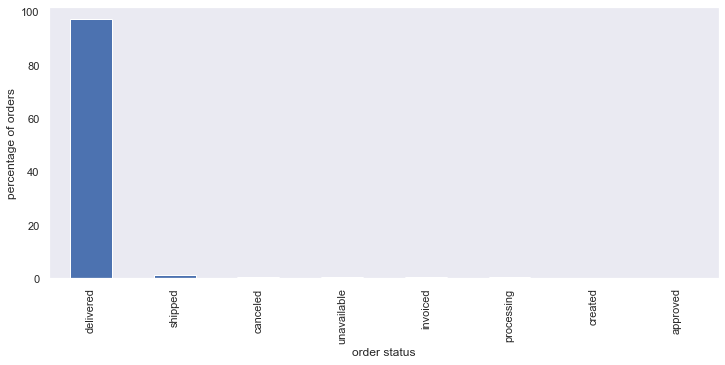

In [175]:
sns.set(style='dark')
plt.figure(figsize=(12,5))
B.plot(kind="bar")
plt.xlabel('order status')
plt.ylabel('percentage of orders')
plt.show()

97% of orders have order_status 'delivered',1% have order_status 'shipped',0.62% are 'cancelled'. This states that performance of firm is good in fulfilling the orders.

# Question 2

 /Find the states with maximum no of orders ?/

In [176]:
 A=pd.unique(df12['customer_state'])        #finding unique customer states#
 print(A)

['CE' 'MG' 'MA' 'RS' 'SP' 'RJ' 'ES' 'SE' 'PI' 'PA' 'AP' 'GO' 'RN' 'RR'
 'BA' 'PE' 'AM' 'PB' 'PR' 'SC' 'AL' 'MT' 'AC' 'DF' 'MS' 'TO' 'RO']


In [177]:
A=df12.groupby('customer_state')['order_id'].count().sort_values(ascending=False)
A

customer_state
SP    41622
RJ    12819
MG    11591
RS     5451
PR     5025
SC     3619
BA     3367
DF     2135
ES     2018
GO     2017
PE     1650
CE     1334
PA      971
MT      906
MA      743
MS      714
PB      535
PI      491
RN      484
AL      413
SE      350
TO      280
RO      253
AM      147
AC       80
AP       68
RR       45
Name: order_id, dtype: int64

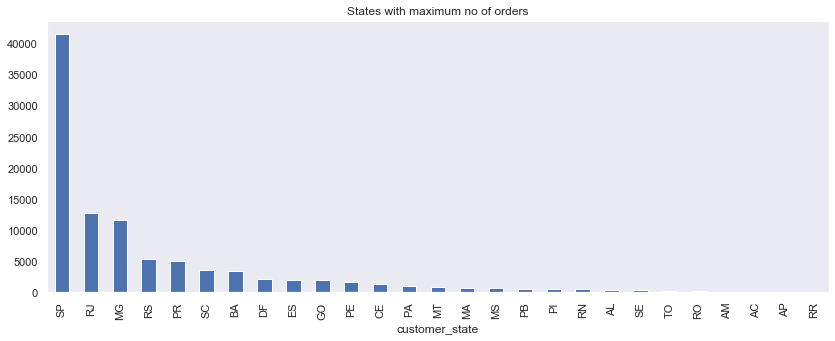

In [178]:
plt.figure(figsize=(14,5)) 
plt.title('States with maximum no of orders')
A.plot(kind="bar")
plt.show()

SP is the state with maxium no of orders & Maximum % of orders are from first 7 states.

# Question 3

/Find the average days required to deliver a product to the customer?/

In [96]:
#creating a new column "order delivery days (new)" by taking difference of "order_approved_at" & "order_delivered_to_customer_date" which shows no of days taken to reach the order to customer#

In [6]:
df12.sample(8)

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new)
51710,fb92827a7e,dac216c244,SP,0ee3384432,delivered,11-03-18 16:26,11-03-18 16:35,13-03-18 11:34,19-03-18 21:18,03-04-18 0:00,8,8
33594,97170ff49e,a0ea502116,SP,d62354cddc,delivered,17-08-18 22:52,17-08-18 23:09,20-08-18 9:25,21-08-18 15:50,23-08-18 0:00,4,4
52440,e18f0839b6,6c734067f6,SP,be39a55492,delivered,08-03-18 12:49,08-03-18 13:08,08-03-18 23:06,12-03-18 22:16,20-03-18 0:00,4,4
93820,5fd34b6c72,a9fb026555,MG,020c2cd20d,delivered,28-11-17 14:19,28-11-17 14:30,29-11-17 16:24,04-12-17 18:08,21-12-17 0:00,6,6
26021,1388eca3c7,ae52fa61f2,MG,423a4ec157,delivered,06-06-17 23:09,07-06-17 14:25,09-06-17 9:21,19-06-17 19:58,03-07-17 0:00,12,12
44014,74493089ca,298888cf6c,BA,f27fd91faf,delivered,14-06-17 15:39,14-06-17 16:02,16-06-17 15:36,28-06-17 16:46,17-07-17 0:00,14,14
62995,e79f3050c5,82b6a2e2d9,SP,f9161376e0,delivered,26-04-18 21:24,26-04-18 21:35,27-04-18 15:26,30-04-18 23:03,11-05-18 0:00,4,4
94623,c4d9ef5fc8,dc256bf8f2,SP,364f4189ee,delivered,14-08-17 8:40,14-08-17 8:55,14-08-17 19:31,17-08-17 19:52,01-09-17 0:00,3,3


In [9]:
 df12['order delivery days(new)'].mean()     

17.668368170446293

In [4]:
newdf12=df12.dropna(axis=0,how= 'any',inplace=False) # creating a new dataframe and dropping null values rows temporarily#

In [7]:
newdf12['order delivery days(new)'].mean()

11.983526597680827

In [185]:
print("the average days reqiured to deliver a product to a customer :",round(newdf12['order delivery days(new)'].mean() ))

the average days reqiured to deliver a product to a customer : 12


In [8]:
ax=newdf12.groupby('order delivery days(new)').count().sort_values(by="order_delivery days",ascending=False)[:10]
ax.drop(['customer_unique_id','customer_state','order_status','order_purchase_timestamp','order_purchase_timestamp','order_approved_at','order_delivered_to_carrier_date','order_delivered_to_customer_date','order_estimated_delivery_date','customer_id','order_id'],axis=1)                                                              #grouping data according to "order delivery days"

,order_delivery days
order delivery days(new),
7,7688
6,7344
8,6702
9,6059
5,5648
10,5497
11,4978
4,4724
12,4696


Results of above analysis-

1.the average days reqiured to deliver a product to a customer is 12

2.The delivery time of most of orders were between "6-9 Days". 

# Question 4

/what is the max,min,Average price of the items purchased? /

In [11]:
df_order_items = pd.read_csv('order_items.csv')      #reading the order items csv file#
df_order_items.head(4)

,order_id,product_id,seller_id,price
0,00010242fe,4244733e06,48436dade1,58
1,00018f77f2,e5f2d52b80,dd7ddc04e1,239
2,000229ec39,c777355d18,5b51032edd,199
3,00024acbcd,7634da152a,9d7a1d34a5,12


In [57]:
df_order_items.isnull().sum().sort_values(ascending=True)     # no null values are found in this csv file#

order_id      0
product_id    0
seller_id     0
price         0
dtype: int64

In [58]:
df_order_items.describe()

,price
count,112650.000000
mean,120.052668
std,183.699547
min,0.000000
25%,39.000000
50%,74.000000
75%,134.000000
max,6735.000000


In [20]:
print("Maximum price an item :", max(df_order_items.price))
print("Minimum price of an item is :", min(df_order_items.price))
print("Average price of an item :", round((df_order_items.price).mean()))


Maximum price an item : 6735
Minimum price of an item is : 0
Average price of an item : 120


# Question 5

In [ ]:
/Compare different mode of payments which users have used ?/


In [12]:
 df_payments = pd.read_csv('payments.csv')    # reading the payment csv file#

In [28]:
df_payments.shape

(103886, 3)

In [42]:
 df_payments.head(2)

,order_id,payment_type,payment_value
0,b81ef226f3,credit_card,99
1,a9810da829,credit_card,24


In [41]:
 df_payments.isnull().sum().sort_values(ascending=True)         #no null values are present #

order_id         0
payment_type     0
payment_value    0
dtype: int64

# Merging "orders & "payments" dataframes

In [13]:
df24 = pd.merge(df_orders,df_payments,on='order_id',how='left')     #merging orders & payment dataframes#
df24.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),payment_type,payment_value
0,e481f51cbd,9ef432eb62,delivered,02-10-17 10:56,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,credit_card,18.0
1,e481f51cbd,9ef432eb62,delivered,02-10-17 10:56,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,2.0


In [43]:
count_of_payments=df24.groupby('payment_type')['payment_value'].count().sort_values(ascending=False).reset_index()
      

In [125]:
print(g)

  payment_type  payment_value
0  credit_card          76795
1       boleto          19784
2      voucher           5775
3   debit_card           1529
4  not_defined              3


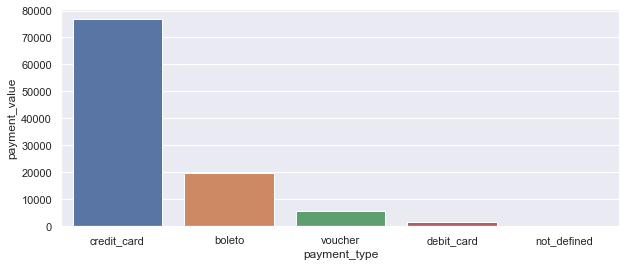

In [46]:
plt.figure(figsize=(10,4))
sns.set(style='darkgrid')                                           #most of the payments are done through credit card#
sns.barplot(x='payment_type',y='payment_value',data=count_of_payments)
plt.show()

In [136]:
avg_payment_amount=df24.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False).reset_index()
avg_payment_amount

,payment_type,payment_value
0,credit_card,162.840641
1,boleto,144.560301
2,debit_card,142.078483
3,voucher,65.305628
4,not_defined,0.000000


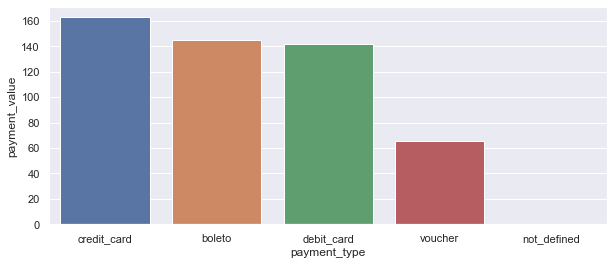

In [53]:
plt.figure(figsize=(10,4))                                      # graph for avg_payment #
sns.set(style='darkgrid')
sns.barplot(x='payment_type',y='payment_value',data=avg_payment_amount)
plt.show()


In [135]:
sum_of_payment=df24.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).reset_index()
sum_of_payment                                        

,payment_type,payment_value
0,credit_card,12505347.0
1,boleto,2859981.0
2,voucher,377140.0
3,debit_card,217238.0
4,not_defined,0.0


Average_Payment_amount is similar for debit card,boleto,credit_card but lower for vocher mode.No of payments & total sum of payments is highest for credit card. This shows us that most of the customers prefers credit card as comapared to other modes.

# Question 6

/ what are the top 15 categories of products according to sales & Quantity?/

In [14]:
df_products = pd.read_csv('products.csv')
df_products.head(5)

,product_id,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,1e9e8ef04d,1.0,16.0,10.0,14.0,perfumery,0.225
1,3aa071139c,1.0,30.0,18.0,20.0,art,1.000
2,96bd76ec88,1.0,18.0,9.0,15.0,sports_leisure,0.154
3,cef67bcfe1,1.0,26.0,4.0,26.0,baby,0.371
4,9dc1a7de27,4.0,20.0,17.0,13.0,housewares,0.625


In [8]:
df_products.shape

(32951, 7)

# Merging orders_items,products & payments dataframes

In [15]:
df_35 = pd.merge(df_order_items,df_products,on='product_id' ,how='left')
df_354=pd.merge(df_35,df_payments,on='order_id',how='left')
df_354.head()

,order_id,product_id,seller_id,price,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg,payment_type,payment_value
0,00010242fe,4244733e06,48436dade1,58,4.0,28.0,9.0,14.0,cool_stuff,0.65,credit_card,72.0
1,00018f77f2,e5f2d52b80,dd7ddc04e1,239,2.0,50.0,30.0,40.0,pet_shop,30.00,credit_card,259.0
2,000229ec39,c777355d18,5b51032edd,199,2.0,33.0,13.0,33.0,furniture_decor,3.05,credit_card,216.0
3,00024acbcd,7634da152a,9d7a1d34a5,12,1.0,16.0,10.0,15.0,perfumery,0.20,credit_card,25.0
4,00042b26cf,ac6c362306,df560393f3,199,1.0,35.0,40.0,30.0,garden_tools,3.75,credit_card,218.0


In [8]:
df_354.shape

(117604, 12)

In [37]:
df_354.isnull().sum()    

order_id                    0
product_id                  0
seller_id                   0
price                       0
product_photos_count     1698
product_length_cm          20
product_height_cm          20
product_width_cm           20
product_category_name       0
product_weight_kg          20
payment_type                3
payment_value               3
dtype: int64

In [50]:
df_354['product_category_name'].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', 'other',
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety'

In [58]:
B=pd.value_counts(df_354['product_category_name'])#There are  total 72 product categories sold by the company#
B

bed_bath_table               11823
health_beauty                 9975
sports_leisure                8945
furniture_decor               8744
computers_accessories         8082
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name, Length: 72, dtype: int64

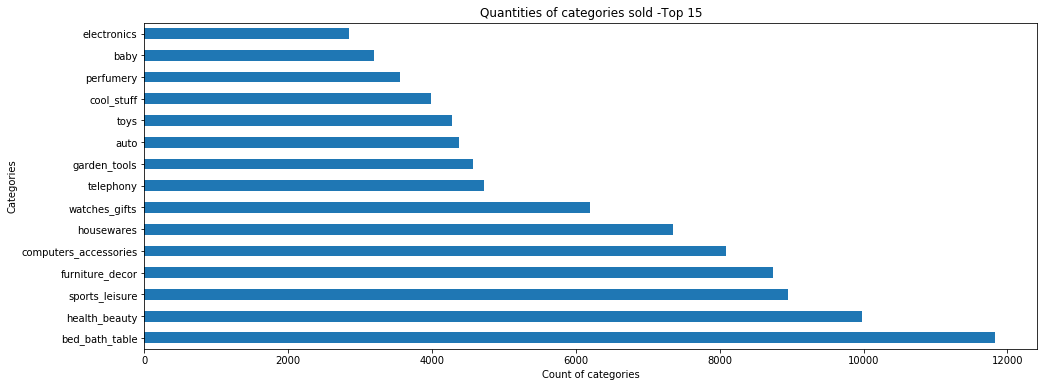

In [93]:
F=pd.value_counts(df_354['product_category_name']).sort_values(ascending=False)[:15] # Graph shows Quantities of categories sold#
ax=F.plot(kind='barh',figsize=(16,6))
ax.set_xlabel('Count of categories')
ax.set_ylabel('Categories')
ax.set_title('Quantities of categories sold -Top 15')
plt.show()

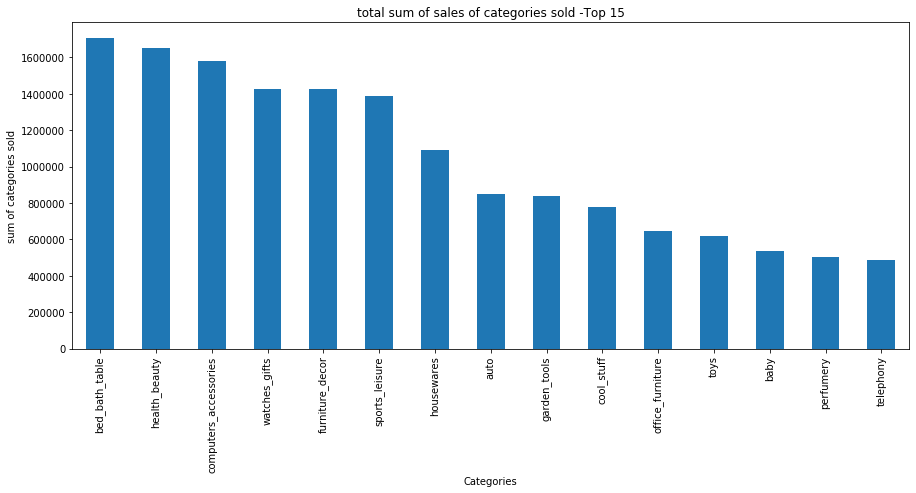

In [108]:
M=df_354.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False)[:15]
fc=M.plot(kind='bar',figsize=(15,6))  
fc.set_ylabel('sum of categories sold')   # Graph shows total sum of sales of each category #
fc.set_xlabel('Categories')
fc.set_title('total sum of sales of categories sold -Top 15')
plt.show()

1.The Quantities of 'bed_bath_table' sold is higher and also its sales is higher as compared to other categories.
2.bed_bath_table,health_beauty,computer_accessories ,watch_gifts,furniture_decor are have highest sum of sales.

# Question 7

/ Compare the orders vs no of delivery days.(if delivery time is greater than 10 days label that order as good order else bad order)/

In [90]:
df_sellers.head(2)

,seller_id,seller_state
0,3442f8959a,SP
1,d1b65fc7de,SP


In [91]:
df_sellers.groupby('seller_state')['seller_id'].count().sort_values(ascending=False)[:10]

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

The above data shows the no of sellers in each state.Sp is the state with highest no of sellers.

# Merging orders,order_items,seller dataframes

In [16]:
df_23=pd.merge(newdf12,df_order_items,on='order_id',how='inner')
df_236=pd.merge(df_23,df_sellers,on='seller_id',how='inner')
df_236.head()

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),product_id,seller_id,price,seller_state
0,06b8999e2f,861eff4711,SP,00e7ee1b05,delivered,16-05-17 15:05,16-05-17 15:22,23-05-17 10:47,25-05-17 10:35,05-06-17 0:00,9,9,a9516a079e,7c67e1448b,124,SP
1,4e7b3e0028,060e732b5b,SP,b2059ed67c,delivered,19-05-18 16:07,20-05-18 16:19,11-06-18 14:31,14-06-18 17:58,13-06-18 0:00,25,25,bd07b66896,7c67e1448b,139,SP
2,b2b6027bc5,259dac7578,SP,951670f923,delivered,13-03-18 16:06,13-03-18 17:29,27-03-18 23:22,28-03-18 16:04,10-04-18 0:00,15,15,a5647c44af,7c67e1448b,149,SP
3,4c06b42fbf,07d190f123,MA,997fd4b373,delivered,08-07-18 9:59,08-07-18 10:30,25-07-18 15:12,08-08-18 19:42,16-08-18 0:00,31,31,8ed094bfe0,7c67e1448b,199,SP
4,8276de07ef,332cf4e83e,RS,b63fff1ef8,delivered,02-04-17 22:15,04-04-17 5:55,13-04-17 16:28,02-05-17 13:53,08-05-17 0:00,28,28,aba86c093c,7c67e1448b,129,SP


In [17]:
df_236.sort_values(by='order delivery days(new)',ascending=False,inplace=True)
df_236.head(2)

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),product_id,seller_id,price,seller_state
39927,75683a9233,4a2519b699,ES,ca07593549,delivered,21-02-17 23:31,23-02-17 2:35,08-03-17 13:47,19-09-17 14:36,22-03-17 0:00,208,208,8eed5d27f5,2a1348e9ad,229,MG
29985,d306426abe,eb21169c31,RJ,1b3190b2df,delivered,23-02-18 14:57,23-02-18 15:16,26-02-18 18:49,19-09-18 23:24,15-03-18 0:00,208,208,ee406bf280,7a67c85e85,144,SP


In [18]:
def order_type (order_deliverydays):     # creating a function order_type#
    if order_deliverydays>10:               #if order delivery days >10 then'bad order'
        order_deliverydays="bad order"       #or else 'good order'
    else:
        order_deliverydays="Good order"
    return  order_deliverydays

In [19]:
order_type(9)


'Good order'

In [39]:
df_236['order_type']=df_236['order_delivery days'].apply(order_type)
df_236.head(8)

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),product_id,seller_id,price,seller_state,order_type
39927,75683a9233,4a2519b699,ES,ca07593549,delivered,21-02-17 23:31,23-02-17 2:35,08-03-17 13:47,19-09-17 14:36,22-03-17 0:00,208,208,8eed5d27f5,2a1348e9ad,229,MG,bad order
29985,d306426abe,eb21169c31,RJ,1b3190b2df,delivered,23-02-18 14:57,23-02-18 15:16,26-02-18 18:49,19-09-18 23:24,15-03-18 0:00,208,208,ee406bf280,7a67c85e85,144,SP,bad order
74151,9cf2c3fa26,3c2564d42f,SE,285ab9426d,delivered,08-03-17 22:47,08-03-17 22:47,09-03-17 8:53,19-09-17 14:00,06-04-17 0:00,195,195,0c6fc9b931,c847e07530,429,MG,bad order
53775,217906bc11,c6c0b794d3,PI,2fb597c2f7,delivered,08-03-17 18:09,08-03-17 18:09,13-03-17 8:54,19-09-17 14:33,17-04-17 0:00,195,195,8ed094bfe0,a7f13822ce,239,SP,bad order
21084,1a8a4a30dc,4df2d7257a,PI,0f4519c5f1,delivered,09-03-17 13:26,09-03-17 13:26,22-03-17 5:28,19-09-17 14:38,11-04-17 0:00,194,194,e0d64dcfaa,7e93a43ef3,231,SP,bad order
39914,7815125148,f0785d41d4,PA,440d0d17af,delivered,07-03-17 23:59,09-03-17 1:11,15-03-17 13:00,19-09-17 15:12,07-04-17 0:00,194,194,3bec03860f,2a1348e9ad,159,MG,bad order
76190,cb2caaaead,4cb8ad9a45,SP,47b40429ed,delivered,03-01-18 9:44,03-01-18 10:31,06-02-18 1:48,13-07-18 20:51,19-01-18 0:00,191,191,ebf1c13032,cb41bfbcbd,399,SP,bad order
108892,65b1423788,78d26ae26b,SP,2fe324febf,delivered,13-03-17 20:17,13-03-17 20:17,17-03-17 7:23,19-09-17 17:00,05-04-17 0:00,190,190,b75683e296,df683dfda8,39,RS,bad order


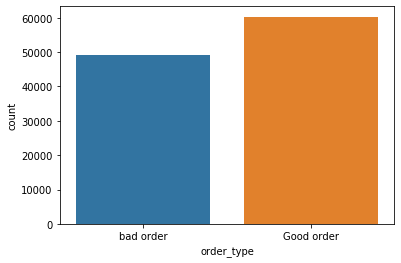

In [21]:
sns.countplot(x='order_type',data=df_236)       #percentage of good orders are more than bad orders#
plt.show()

In [22]:
B=round(pd.value_counts(df_236['order_type'],normalize= True)*100)
B

Good order    55.0
bad order     45.0
Name: order_type, dtype: float64

# Merging orders,order_items,products,seller dataframes

From the above analysis we can see that percentages of 'good orders'is higher,Which means delivery time of 45% orders are more than 10 days and 55% products are delivered in less than 10 days.

In [23]:
df_2365=pd.merge(df_236,df_products,on='product_id',how='inner')
df_2365.head()

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,...,seller_id,price,seller_state,order_type,product_photos_count,product_length_cm,product_height_cm,product_width_cm,product_category_name,product_weight_kg
0,75683a9233,4a2519b699,ES,ca07593549,delivered,21-02-17 23:31,23-02-17 2:35,08-03-17 13:47,19-09-17 14:36,22-03-17 0:00,...,2a1348e9ad,229,MG,bad order,1.0,16.0,2.0,11.0,auto,2.80
1,ab91349e3f,eae9469721,SP,d23555007f,delivered,19-02-17 12:22,19-02-17 12:32,22-02-17 17:36,14-03-17 12:57,21-03-17 0:00,...,2a1348e9ad,229,MG,bad order,1.0,16.0,2.0,11.0,auto,2.80
2,86bbc4a292,e1f24958ea,RS,82bfafb84a,delivered,28-01-17 19:10,28-01-17 19:30,31-01-17 17:26,10-02-17 8:53,08-03-17 0:00,...,2a1348e9ad,229,MG,bad order,1.0,16.0,2.0,11.0,auto,2.80
3,d306426abe,eb21169c31,RJ,1b3190b2df,delivered,23-02-18 14:57,23-02-18 15:16,26-02-18 18:49,19-09-18 23:24,15-03-18 0:00,...,7a67c85e85,144,SP,bad order,1.0,36.0,24.0,22.0,cool_stuff,1.05
4,feee0385d0,b4897634cc,MT,1161d4dd2b,delivered,17-02-18 15:45,17-02-18 15:55,19-02-18 18:24,13-04-18 22:07,21-03-18 0:00,...,7a67c85e85,144,SP,bad order,1.0,36.0,24.0,22.0,cool_stuff,1.05


# Question 8

/list product categories with highest Average delivery time/

In [25]:
round(df_2365.groupby('product_category_name')['order_delivery days'].mean().sort_values(ascending=False)[:20])

product_category_name
office_furniture                     20.0
christmas_supplies                   15.0
fashion_shoes                        15.0
furniture_mattress_and_upholstery    14.0
home_comfort_2                       14.0
security_and_services                14.0
furniture_living_room                13.0
home_appliances_2                    13.0
fashion_underwear_beach              13.0
garden_tools                         13.0
consoles_games                       13.0
home_confort                         13.0
computers                            13.0
home_construction                    13.0
audio                                13.0
furniture_bedroom                    13.0
computers_accessories                13.0
fashion_male_clothing                13.0
tablets_printing_image               12.0
dvds_blu_ray                         12.0
Name: order_delivery days, dtype: float64

The above analysis shows 20 product categories with highest delivery time .From this we can conclude that firm has to work on delivery time of these product categories for better customer service. 

/List top 20 bad orders(orders with highest delivery time)/ 

In [27]:
print('Top 20 bad order_ids are')
df_236.head(20)

Top 20 bad order_ids are


,customer_id,customer_unique_id,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),product_id,seller_id,price,seller_state,order_type
39927,75683a9233,4a2519b699,ES,ca07593549,delivered,21-02-17 23:31,23-02-17 2:35,08-03-17 13:47,19-09-17 14:36,22-03-17 0:00,208,208,8eed5d27f5,2a1348e9ad,229,MG,bad order
29985,d306426abe,eb21169c31,RJ,1b3190b2df,delivered,23-02-18 14:57,23-02-18 15:16,26-02-18 18:49,19-09-18 23:24,15-03-18 0:00,208,208,ee406bf280,7a67c85e85,144,SP,bad order
74151,9cf2c3fa26,3c2564d42f,SE,285ab9426d,delivered,08-03-17 22:47,08-03-17 22:47,09-03-17 8:53,19-09-17 14:00,06-04-17 0:00,195,195,0c6fc9b931,c847e07530,429,MG,bad order
53775,217906bc11,c6c0b794d3,PI,2fb597c2f7,delivered,08-03-17 18:09,08-03-17 18:09,13-03-17 8:54,19-09-17 14:33,17-04-17 0:00,195,195,8ed094bfe0,a7f13822ce,239,SP,bad order
21084,1a8a4a30dc,4df2d7257a,PI,0f4519c5f1,delivered,09-03-17 13:26,09-03-17 13:26,22-03-17 5:28,19-09-17 14:38,11-04-17 0:00,194,194,e0d64dcfaa,7e93a43ef3,231,SP,bad order
39914,7815125148,f0785d41d4,PA,440d0d17af,delivered,07-03-17 23:59,09-03-17 1:11,15-03-17 13:00,19-09-17 15:12,07-04-17 0:00,194,194,3bec03860f,2a1348e9ad,159,MG,bad order
76190,cb2caaaead,4cb8ad9a45,SP,47b40429ed,delivered,03-01-18 9:44,03-01-18 10:31,06-02-18 1:48,13-07-18 20:51,19-01-18 0:00,191,191,ebf1c13032,cb41bfbcbd,399,SP,bad order
108892,65b1423788,78d26ae26b,SP,2fe324febf,delivered,13-03-17 20:17,13-03-17 20:17,17-03-17 7:23,19-09-17 17:00,05-04-17 0:00,190,190,b75683e296,df683dfda8,39,RS,bad order
104331,f85e9ec071,e7834c7e01,MG,c27815f7e3,delivered,15-03-17 23:23,15-03-17 23:23,21-03-17 14:50,19-09-17 17:14,10-04-17 0:00,188,188,05e8eca656,054694fa03,487,SP,bad order
103236,8199345f57,186a453a38,SE,2d7561026d,delivered,15-03-17 11:24,15-03-17 11:24,16-03-17 9:29,19-09-17 14:38,13-04-17 0:00,188,188,7594c5fa74,e83c76265f,32,SP,bad order


# Question 9

/Visualize state vs average delivery time/

In [28]:
df_236.groupby('seller_state')['order_delivery days'].mean().sort_values(ascending=False)

seller_state
AM    48.000000
CE    17.280899
MA    17.177057
RO    17.142857
MT    14.274648
PI    13.363636
BA    13.217391
SC    12.953559
PR    12.815986
PA    12.750000
RN    12.303571
ES    12.277008
GO    12.275591
MG    12.243022
PE    12.211712
DF    11.915621
MS    11.880000
SP    11.685521
SE    11.666667
PB    11.648649
RJ    11.466452
RS    10.982847
Name: order_delivery days, dtype: float64

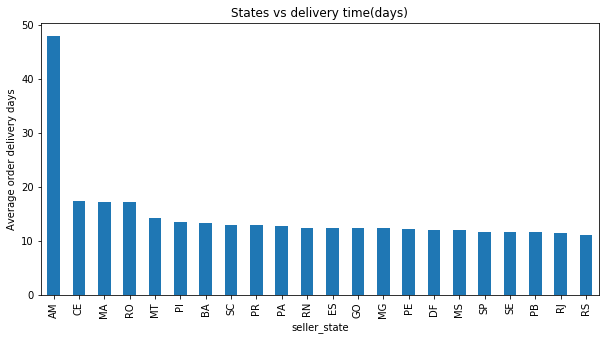

In [29]:
gc=df_236.groupby('seller_state')['order_delivery days'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
gc.set_ylabel('Average order delivery days')
gc.set_title("States vs delivery time(days)")
plt.show()

From analysis we can find that AM is the state with highest Average delivery time & RS is the state with lowest Average delivery time.In other states delivery time is almost equal

# Question 10 

/What are the Yearwise Total sum of sales(total payment value) and Quantity of sales/ 

In [30]:
df24.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),payment_type,payment_value
0,e481f51cbd,9ef432eb62,delivered,02-10-17 10:56,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,credit_card,18.0
1,e481f51cbd,9ef432eb62,delivered,02-10-17 10:56,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,2.0


In [31]:
df24['order_purchase_timestamp']=pd.to_datetime(df24['order_purchase_timestamp'])

In [32]:
import datetime
df24.reset_index()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),payment_type,payment_value
0,0,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,credit_card,18.0
1,1,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,2.0
2,2,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,18.0
3,3,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:00,26-07-18 3:24,26-07-18 14:31,07-08-18 15:27,13-08-18 0:00,12,12,boleto,141.0
4,4,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:00,08-08-18 8:55,08-08-18 13:50,17-08-18 18:06,04-09-18 0:00,9,9,credit_card,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103873,103873,9c5dedf39a,39bd1228ee,delivered,2017-09-03 09:54:00,09-03-17 9:54,10-03-17 11:18,17-03-17 15:08,28-03-17 0:00,8,8,credit_card,85.0
103874,103874,63943bddc2,1fca14ff28,delivered,2018-06-02 12:58:00,06-02-18 13:10,07-02-18 23:22,28-02-18 17:37,02-03-18 0:00,22,22,credit_card,195.0
103875,103875,83c1379a01,1aa71eb042,delivered,2017-08-27 14:46:00,27-08-17 15:04,28-08-17 20:52,21-09-17 11:24,27-09-17 0:00,25,25,credit_card,271.0
103876,103876,11c177c8e9,b331b74b18,delivered,2018-08-01 21:28:00,08-01-18 21:36,12-01-18 15:35,25-01-18 23:32,15-02-18 0:00,17,17,credit_card,441.0


In [33]:
df24['order_year']=pd.DatetimeIndex(df24['order_purchase_timestamp']).year
df24.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_to_carrier_date,order_delivered_to_customer_date,order_estimated_delivery_date,order_delivery days,order delivery days(new),payment_type,payment_value,order_year
0,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,credit_card,18.0,2017
1,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,2.0,2017
2,e481f51cbd,9ef432eb62,delivered,2017-02-10 10:56:00,02-10-17 11:07,04-10-17 19:55,10-10-17 21:25,18-10-17 0:00,8,8,voucher,18.0,2017
3,53cdb2fc8b,b0830fb474,delivered,2018-07-24 20:41:00,26-07-18 3:24,26-07-18 14:31,07-08-18 15:27,13-08-18 0:00,12,12,boleto,141.0,2018
4,47770eb910,41ce2a54c0,delivered,2018-08-08 08:38:00,08-08-18 8:55,08-08-18 13:50,17-08-18 18:06,04-09-18 0:00,9,9,credit_card,179.0,2018


In [34]:
df24['order_month']=pd.DatetimeIndex(df24['order_purchase_timestamp']).month

In [68]:
Dataset.to_csv('Dataset.csv')

In [21]:
c=pd.value_counts(df24['order_year'])   
c

2018    56011
2017    47520
2016      347
Name: order_year, dtype: int64

From above analysis we can see that only 347 orders were placed in year 2016,which can tell us that business was in growing stage in this year or it had started late or in end of 2016.

In [27]:
b=df24.groupby('order_year')['payment_value'].sum()
b

order_year
2016      58714.0
2017    7211902.0
2018    8639226.0
Name: payment_value, dtype: float64

In [28]:
ab=df24.groupby('order_year')['payment_value'].count()   
ab

order_year
2016      344
2017    47401
2018    55853
Name: payment_value, dtype: int64

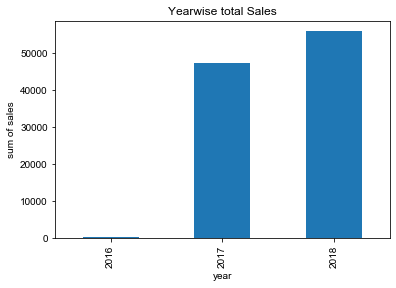

In [26]:
ax=b.plot(kind='bar')
sns.set_style('darkgrid')
ax.set_title('Yearwise total Sales')
ax.set_ylabel('sum of sales')
ax.set_xlabel('year')
plt.show()

The total sum of sales of year 2016 is significantly lower than 2017 & 2018.From this ananlysis we can hypothesize that business was in growing stage in 2016,it has taken significant growth in next 2 years.

# Question 11

/Plot order trend(Number of orders) across every month/

In [398]:
order_trend =df24.groupby('order_month')['order_id'].count()
order_trend

order_month
1      8751
2      8528
3      9726
4      9509
5      9766
6      9344
7     10815
8      9418
9      6150
10     6265
11     9407
12     6199
Name: order_id, dtype: int64

In [33]:
l=df24.groupby('order_month')['payment_value'].sum()   # sum of paymnents in every month#
l

order_month
1     1336337.0
2     1250802.0
3     1505605.0
4     1498770.0
5     1523216.0
6     1442659.0
7     1657364.0
8     1381208.0
9      961550.0
10     984838.0
11    1430263.0
12     937230.0
Name: payment_value, dtype: float64

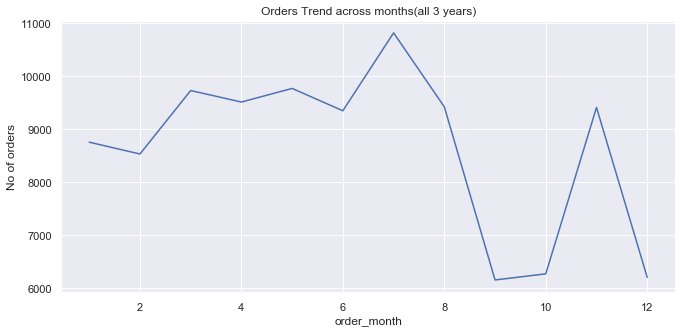

In [405]:
sns.set(style='darkgrid')
f=order_trend.plot(kind="line",figsize=(11,5))
f.set_ylabel('No of orders')
f.set_title('Orders Trend across months(all 3 years)')
plt.show()

From above analysis we can conclude that No of orders were almost equal in 3-6 month, lower in 9th,10th,12th month.
But its was highest in 7th month maybe this can be due to a sale in that period of time.There was a significant downfall after 8th & 11th month.  

# Question 12

# User_feedback

In [34]:
df_user_feedback.head()

,review_id,order_id,review_score,survey_sent_date,survey_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af871,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b2,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e2,5,2018-03-01 00:00:00,2018-03-02 10:26:53


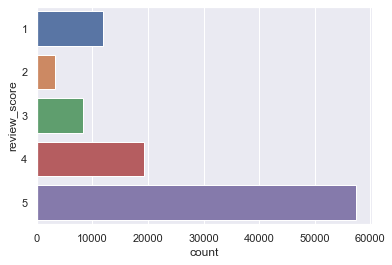

In [391]:
a1 = sns.countplot(y="review_score", data=df_user_feedback )

Users have mostly given review score 5 which states us that most of the customers are satisfied with service provided by the firm.

# Conclusions From above analysis

Sales

-The total sum of sales of year 2016 is significantly lower than 2017 & 2018.From this ananlysis we can hypothesize that business was in growing stage in 2016,it has taken significant growth in next 2 years.

-No of orders were almost equal in 3-6 month, lower in 9th,10th,12th month. But its was highest in 7th month maybe this can be due to a sale in that period of time.There was a significant downfall after 8th & 11th month.

-Orders
-97% of orders have order_status 'delivered',1% have order_status 'shipped',0.62% are 'cancelled'. This states that performance of firm is good in fulfilling the orders.
-SP is the state with maxium no of orders & Maximum % of orders are from first 7 states(SP,RJ,MG,RS,PR,SC,BA).

Products & Payments

-The Quantities of 'bed_bath_table' sold is higher and also its sales is higher as compared to other categories.
-bed_bath_table,health_beauty,computer_accessories ,watch_gifts,furniture_decor are have highest sum of sales.
-Average_Payment_amount is similar for debit card,boleto,credit_card but lower for voucher mode.No of payments & total sum of payments is highest for credit card. This shows us that most of the customers prefers credit card as comapared to other modes

Delivery

-The average days reqiured to deliver a product to a customer is 12 days.
-But,The delivery time of most of orders were between "6-9 Days".
-From analysis we can find that AM is the state with highest Average delivery time & RS is the state with lowest Average delivery time.In other states delivery time is almost equal.
-Firm has to work on delivery time of Some product categories for better customer service.
-Also percentages of 'good orders'is higher,Which means delivery time of 45% of orders are more than 10 days and 55% orders are delivered in less than 10 days.

User_feedback

-Users have mostly given review score 5 which states us that most of the customers are satisfied with service provided by the firm.
